Jorge Castro DAPT NOV 2021

Lab | Imbalanced data

In [84]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [65]:
# Load the dataset and explore the variables.

In [64]:
churnData =pd.read_csv('customer_churn.csv')
display(churnData.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Predict variable Churn using
# a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [67]:
churnDataFiltered = churnData[["Churn","tenure","SeniorCitizen","MonthlyCharges"]]
display(churnDataFiltered)

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [68]:
# Extracting the target variable (Churn)

X = churnDataFiltered.drop('Churn',axis = 1)
y = churnDataFiltered['Churn']

In [70]:
# Extracting and scaling the independent variables

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13) # default fraction is .2

In [72]:
transformer = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.252158,-0.438856,-1.521692
1,-1.293090,-0.438856,-1.495003
2,1.162854,-0.438856,1.373994
3,-1.293090,-0.438856,0.211383
4,-1.170293,-0.438856,0.509959


In [73]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [74]:
#  Building the logistic regression model

<AxesSubplot:>

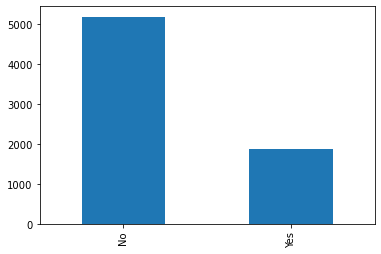

In [75]:
count_classes = churnDataFiltered['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [76]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=13, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=13)

In [77]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)
#logits

In [78]:
# Evaluate the model:

In [79]:
print("Score:\n")
print(LR.score(X_test_scaled, y_test))
pred = LR.predict(X_test_scaled)
print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred,pos_label="Yes"))

Score:

0.7853492333901193
precision:  0.6011904761904762
recall:  0.452914798206278
f1:  0.5166240409207161


 Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(random_state=13,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [82]:
X_train_SMOTE.shape

(7718, 3)

In [83]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
display(LR.score(X_test_scaled, y_test))
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label="Yes"))
print("recall: ",recall_score(y_test,pred,pos_label="Yes"))
print("f1: ",f1_score(y_test,pred,pos_label="Yes"))

0.7291311754684838

precision:  0.4781382228490832
recall:  0.7600896860986547
f1:  0.587012987012987
